In [1]:
!apt-get update
!apt-get install -y ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [75.2 kB]                 
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]              
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,712 kB]                    
Get:

In [2]:
!pip install textgrid


  Preparing metadata (setup.py) ... done
  Created wheel for textgrid: filename=TextGrid-1.6.1-py3-none-any.whl size=10147 sha256=571927b06039e449bd21a1a2abaddbb6363f551a0fa799e07367f1632cd59559
  Stored in directory: /root/.cache/pip/wheels/23/41/f2/e2ef1817bd163de3c21dd078966bdd71bd5c4455841f4ec016
Successfully built textgrid


In [3]:
!pip install librosa spacy transformers torchaudio textgrid
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.5 MB/s eta 0:00:00:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

import os
import shutil
import subprocess
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
import numpy as np
import librosa
import spacy
import textgrid
from transformers import Wav2Vec2Processor, Wav2Vec2Model

In [5]:


input_dir = "/kaggle/input/dev-exp" 
output_dir = "/kaggle/working/dev_clean_wav"  

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")
else:
    print(f"Directory already exists: {output_dir}")

# Function to convert .flac to .wav
def convert_flac_to_wav(input_path, output_path):
    
    command = ["ffmpeg", "-i", input_path, output_path, "-y"]  
    try:
        subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(f"Converted: {input_path} -> {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error converting {input_path}: {e.stderr.decode()}")


for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".flac"):
            flac_path = os.path.join(root, file)
            wav_filename = file.replace(".flac", ".wav")
            wav_path = os.path.join(output_dir, wav_filename)
            convert_flac_to_wav(flac_path, wav_path)


print("\nFiles in dev_clean_wav:")
print(os.listdir(output_dir))

Created directory: /kaggle/working/dev_clean_wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0002.flac -> /kaggle/working/dev_clean_wav/2277-149896-0002.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0019.flac -> /kaggle/working/dev_clean_wav/2277-149896-0019.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0011.flac -> /kaggle/working/dev_clean_wav/2277-149896-0011.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0012.flac -> /kaggle/working/dev_clean_wav/2277-149896-0012.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0000.flac -> /kaggle/working/dev_clean_wav/2277-149896-0000.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0010.flac -> /kaggle/working/dev_clean_wav/2277-149896-0010.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0021.flac -> /kaggle/working/dev_clean_wav/2277-149896-0021.wav
Converted: /kaggle/input/dev-exp/2277/149896/2277-149896-0005.flac -> /kaggle/working/dev_clean_wav/2277

In [7]:

input_dir = "/kaggle/input/training-data-360-3330-3446-1264-1265"  
output_dir = "/kaggle/working/train_clean_360_wav_new"  


if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")
else:
    print(f"Directory already exists: {output_dir}")


def convert_flac_to_wav(input_path, output_path):

    command = ["ffmpeg", "-i", input_path, output_path, "-y"]  
    try:
        subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(f"Converted: {input_path} -> {output_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error converting {input_path}: {e.stderr.decode()}")


for root, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith(".flac"):
            flac_path = os.path.join(root, file)
            wav_filename = file.replace(".flac", ".wav")
            wav_path = os.path.join(output_dir, wav_filename)
            convert_flac_to_wav(flac_path, wav_path)


print("\nFiles in dev_clean_wav:")
print(os.listdir(output_dir))

Created directory: /kaggle/working/train_clean_360_wav_new
Converted: /kaggle/input/training-data-360-3330-3446-1264-1265/3446-176270-0018.flac -> /kaggle/working/train_clean_360_wav_new/3446-176270-0018.wav
Converted: /kaggle/input/training-data-360-3330-3446-1264-1265/1264-129805-0003.flac -> /kaggle/working/train_clean_360_wav_new/1264-129805-0003.wav
Converted: /kaggle/input/training-data-360-3330-3446-1264-1265/3330-170956-0057.flac -> /kaggle/working/train_clean_360_wav_new/3330-170956-0057.wav
Converted: /kaggle/input/training-data-360-3330-3446-1264-1265/3446-144021-0019.flac -> /kaggle/working/train_clean_360_wav_new/3446-144021-0019.wav
Converted: /kaggle/input/training-data-360-3330-3446-1264-1265/1265-135635-0021.flac -> /kaggle/working/train_clean_360_wav_new/1265-135635-0021.wav
Converted: /kaggle/input/training-data-360-3330-3446-1264-1265/1264-129805-0066.flac -> /kaggle/working/train_clean_360_wav_new/1264-129805-0066.wav
Converted: /kaggle/input/training-data-360-3330

In [8]:

dev_clean_dir = "/kaggle/input/dev-clean"
train_clean360_dir = "/kaggle/input/training-clean-360-1265"


for subset, input_dir in [("dev-clean", dev_clean_dir), ("train-360-clean", train_clean360_dir)]:
    src_dir = "/kaggle/input/librispeech-allignment-1"  
    for speaker in os.listdir(src_dir):
        speaker_src = os.path.join(src_dir, speaker)
        speaker_dst = os.path.join(input_dir, speaker)
        if os.path.isdir(speaker_src) and os.path.exists(speaker_dst):
            for book in os.listdir(speaker_src):
                book_src = os.path.join(speaker_src, book)
                book_dst = os.path.join(speaker_dst, book)
                if os.path.isdir(book_src) and os.path.exists(book_dst):
                    for file in os.listdir(book_src):
                        if file.endswith(".TextGrid"):  # Changed from .alignment.txt
                            shutil.copy(os.path.join(book_src, file), book_dst)
                            print(f"Copied {file} to {book_dst}")

print("dev_clean alignment example:", os.path.exists(os.path.join(dev_clean_dir, "/kaggle/input/librispeech-allignment-1/128104")))
print("train_clean360 alignment example:", os.path.exists(os.path.join(train_clean360_dir, "/kaggle/input/librispeech-allignment-1/135635")))

dev_clean alignment example: True
train_clean360 alignment example: True


In [6]:
alignment_dir = "/kaggle/input/alignment-libri-new"

alignment_map = {}
for book in os.listdir(alignment_dir):
    book_dir = os.path.join(alignment_dir, book)
    if os.path.isdir(book_dir):
        for file in os.listdir(book_dir):
            if file.endswith(".TextGrid"):
                utterance_id = file.replace(".TextGrid", "")
                alignment_map[utterance_id] = os.path.join(book_dir, file)

In [10]:
def seq2label_encoding(doc):
    labels = []
    # First, populate pos_words with all tokens
    pos_words = {}
    for i, token in enumerate(doc):
        pos_words.setdefault(token.pos_, []).append((token.text, i))
    

    for i, token in enumerate(doc):
        head_idx = token.head.i
        head_pos = token.head.pos_
        if head_idx == i:  # Root
            labels.append("0@ROOT")
        else:
            pos_list = pos_words.get(head_pos, [])
            # Find the position of the head in pos_list
            head_pos_indices = [idx for word, idx in pos_list]
            if head_idx in head_pos_indices:
                head_pos_idx = head_pos_indices.index(head_idx)
                # Compute relative position
                rel_pos = head_pos_idx - sum(1 for idx in head_pos_indices if idx < i)
                labels.append(f"{rel_pos}@{head_pos}")
            else:
                # Fallback if head_idx not found
                labels.append("0@UNKNOWN")
                print(f"Warning: Could not find head_idx {head_idx} for POS {head_pos} at token {i} ({token.text})")
    return labels

In [14]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model


In [15]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:


def process_utterance(wav_path, alignment_path):
    sample_rate = 16000
    wav, _ = librosa.load(wav_path, sr=sample_rate)
    
    # Extract wav2vec2 features
    inputs = processor(wav, sampling_rate=sample_rate, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs).last_hidden_state  # Shape: (1, sequence_length, 768)
    
    # Compute frame rate (number of frames per second)
    sequence_length = outputs.shape[1]
    audio_duration = len(wav) / sample_rate
    frame_rate = sequence_length / audio_duration
    
    # Parse .TextGrid
    tg = textgrid.TextGrid.fromFile(alignment_path)
    word_tier = [tier for tier in tg if tier.name == "words"][0]
    words = [interval.mark for interval in word_tier if interval.mark]
    start_times = [interval.minTime for interval in word_tier if interval.mark]
    end_times = [interval.maxTime for interval in word_tier if interval.mark]
    
    text = ' '.join(words).replace("  ", " ")
    doc = nlp(text)
    
    # Debug: Compare words and tokens
    spacy_tokens = [token.text for token in doc]
    print(f".TextGrid words: {words}")
    print(f"spaCy tokens: {spacy_tokens}")
    
    # Check if lengths match
    if len(words) != len(spacy_tokens):
        print(f"Warning: Tokenization mismatch. .TextGrid has {len(words)} words, spaCy has {len(spacy_tokens)} tokens.")
        adjusted_words = []
        adjusted_starts = []
        adjusted_ends = []
        i = 0
        for token in spacy_tokens:
            if i < len(words):
                adjusted_words.append(token)
                adjusted_starts.append(start_times[i])
                adjusted_ends.append(end_times[i])
                i += 1
            else:
                adjusted_words.append(token)
                adjusted_starts.append(adjusted_ends[-1] if adjusted_ends else 0)
                adjusted_ends.append(adjusted_ends[-1] + 0.1 if adjusted_ends else 0.1)
        words = adjusted_words
        start_times = adjusted_starts
        end_times = adjusted_ends
    
    labels = seq2label_encoding(doc)
    
    if len(words) != len(labels):
        print(f"Error: Length mismatch. Words: {len(words)}, Labels: {len(labels)}")
        return None
    
    # Extract wav2vec2 embeddings for each word
    word_data = []
    for word, start, end, label in zip(words, start_times, end_times, labels):
        start_frame = int(start * frame_rate)
        end_frame = int(end * frame_rate)
        # Ensure frames are within bounds
        start_frame = max(0, min(start_frame, sequence_length - 1))
        end_frame = max(start_frame, min(end_frame, sequence_length))
        if end_frame > start_frame:
            emb = outputs[0, start_frame:end_frame].mean(dim=0).numpy()  # Mean pooling
        else:
            emb = outputs[0, start_frame].numpy()  # Single frame if zero length
        word_data.append((word, start, end, label, emb))
    
    return word_data



In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
import numpy as np
from collections import defaultdict

In [18]:
# Process datasets
output_data_dir = "/kaggle/working/seq2label_data_embedding"
os.makedirs(output_data_dir, exist_ok=True)

for subset, wav_dir, orig_dir in [
    ("dev-clean", "/kaggle/working/dev_clean_wav", "/kaggle/input/dev-clean-1"),
    ("train-360-clean", "/kaggle/working/train_clean_360_wav_new", "/kaggle/input/training-data-360-3330-3446-1264-1265")
]:
    
    for root, _, files in os.walk(orig_dir):
        for file in files:
            if file.endswith(".flac"):
                utterance_id = file.replace(".flac", "")
                wav_path = os.path.join(wav_dir, f"{utterance_id}.wav")
                if utterance_id in alignment_map and os.path.exists(wav_path):
                    word_data = process_utterance(wav_path, alignment_map[utterance_id])
                    if word_data is None:
                        print(f"Skipped: {utterance_id} due to processing error")
                        continue
                    print(f"Processed: {utterance_id}")
                    torch.save(word_data, os.path.join(output_data_dir, f"{utterance_id}_features.pt"))

.TextGrid words: ['only', 'his', 'heart', 'and', 'lungs', 'worked', 'on', 'at', 'a', 'strong', 'measured', 'rate']
spaCy tokens: ['only', 'his', 'heart', 'and', 'lungs', 'worked', 'on', 'at', 'a', 'strong', 'measured', 'rate']
Processed: 1272-141231-0007
.TextGrid words: ['a', 'red', 'haired', 'mountain', 'of', 'a', 'man', 'with', 'an', 'apparently', 'inexhaustible', 'store', 'of', 'energy']
spaCy tokens: ['a', 'red', 'haired', 'mountain', 'of', 'a', 'man', 'with', 'an', 'apparently', 'inexhaustible', 'store', 'of', 'energy']
Processed: 1272-141231-0018
.TextGrid words: ['the', 'king', 'has', 'fled', 'in', 'disgrace', 'and', 'your', 'friends', 'are', 'asking', 'for', 'you']
spaCy tokens: ['the', 'king', 'has', 'fled', 'in', 'disgrace', 'and', 'your', 'friends', 'are', 'asking', 'for', 'you']
Processed: 1272-135031-0004
.TextGrid words: ['the', 'buzzer', 's', 'whirr', 'triggered', 'his', 'muscles', 'into', 'complete', 'relaxation']
spaCy tokens: ['the', 'buzzer', 's', 'whirr', 'triggere

In [19]:
data = torch.load("/kaggle/working/seq2label_data_embedding/1265-135635-0000_features.pt")
for word, start, end, label, emb in data:
    print(f"Word: {word}, Start: {start:.2f}, End: {end:.2f}, Label: {label}, Embedding shape: {emb.shape}")

Word: not, Start: 0.16, End: 0.42, Label: 0@ADJ, Embedding shape: (768,)
Word: unmixed, Start: 0.42, End: 0.81, Label: 0@ROOT, Embedding shape: (768,)
Word: with, Start: 0.81, End: 0.96, Label: -1@ADJ, Embedding shape: (768,)
Word: pleasantry, Start: 0.96, End: 1.76, Label: -1@ADP, Embedding shape: (768,)
Word: achieved, Start: 2.21, End: 2.90, Label: -1@NOUN, Embedding shape: (768,)
Word: and, Start: 2.90, End: 3.05, Label: -1@VERB, Embedding shape: (768,)
Word: performed, Start: 3.05, End: 3.65, Label: -1@VERB, Embedding shape: (768,)
Word: by, Start: 3.65, End: 3.82, Label: -1@VERB, Embedding shape: (768,)
Word: messrs, Start: 3.82, End: 4.30, Label: 1@PROPN, Embedding shape: (768,)
Word: dodson, Start: 4.30, End: 4.78, Label: -1@ADP, Embedding shape: (768,)
Word: and, Start: 4.78, End: 4.93, Label: -1@VERB, Embedding shape: (768,)
Word: fogg, Start: 4.93, End: 5.45, Label: -1@VERB, Embedding shape: (768,)
Word: it, Start: 7.32, End: 7.45, Label: 0@AUX, Embedding shape: (768,)
Word:

<ipython-input-19-17bf441a4e01>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("/kaggle/working/seq2label_data_embedding/1265-135635-0000_features.pt")


In [20]:
output_data_dir = "/kaggle/working/seq2label_data_embedding"

In [36]:


output_data_dir = "/kaggle/working/seq2label_data_embedding"
dev_clean_dir = "/kaggle/input/dev-clean"
train_clean360_dir = "/kaggle/input/train-360-clean"


# Step 1: Extract speaker IDs from .flac filenames
def get_speaker_ids_from_files(directory):
    speaker_ids = set()
    for file in os.listdir(directory):
        if file.endswith(".flac"):
            speaker_id = file.split("-")[0]
            speaker_ids.add(speaker_id)
    return speaker_ids

train_speaker_ids = get_speaker_ids_from_files(train_clean360_dir)
dev_speaker_ids = get_speaker_ids_from_files(dev_clean_dir)

print("Train speaker IDs:", train_speaker_ids)
print("Dev speaker IDs:", dev_speaker_ids)

# Step 2: Split .pt files into train and val based on speaker IDs
train_ids = set()
val_ids = set()
for file in os.listdir(output_data_dir):
    if file.endswith("_features.pt"):
        utterance_id = file.replace("_features.pt", "")
        speaker_id = utterance_id.split("-")[0]
        if speaker_id in train_speaker_ids:
            train_ids.add(utterance_id)
        if speaker_id in dev_speaker_ids:
            val_ids.add(utterance_id)

print("Train IDs:", list(train_ids)[:5])
print("Val IDs:", list(val_ids)[:5])
pt_files = [f for f in os.listdir(output_data_dir) if f.endswith("_features.pt")]
print("Available .pt files:", pt_files[:5])
print("Number of train files:", len([f for f in pt_files if f.replace("_features.pt", "") in train_ids]))
print("Number of val files:", len([f for f in pt_files if f.replace("_features.pt", "") in val_ids]))

# Step 3: Build a shared label vocabulary using all .pt files
def build_label_vocabulary(data_dir):
    all_labels = set()
    for file in os.listdir(data_dir):
        if file.endswith("_features.pt"):
            data = torch.load(os.path.join(data_dir, file), weights_only=False)
            for _, _, _, label, _ in data:
                all_labels.add(label)
    label2id = {label: idx for idx, label in enumerate(sorted(all_labels))}
    return label2id

# Build the label vocabulary using all .pt files
label2id = build_label_vocabulary(output_data_dir)
print("Shared label2id:", label2id)

# Step 4: Dataset class with shared label vocabulary
class Seq2LabelDataset(Dataset):
    def __init__(self, data_dir, subset_ids=None, label2id=None):
        self.data_files = []
        for file in os.listdir(data_dir):
            if file.endswith("_features.pt"):
                utterance_id = file.replace("_features.pt", "")
                if subset_ids is None or utterance_id in subset_ids:
                    self.data_files.append(os.path.join(data_dir, file))
        
        if not self.data_files:
            raise ValueError("No data files found for the given subset_ids")
        
        self.label2id = label2id
        self.id2label = {idx: label for label, idx in self.label2id.items()}
    
    def __len__(self):
        return len(self.data_files)
    
    def __getitem__(self, idx):
        data = torch.load(self.data_files[idx], weights_only=False)
        embeddings = []
        labels = []
        for _, _, _, label, emb in data:
            embeddings.append(torch.tensor(emb, dtype=torch.float32))
            labels.append(self.label2id[label])
        embeddings = torch.stack(embeddings)  # Shape: (seq_len, 768)
        labels = torch.tensor(labels, dtype=torch.long)  # Shape: (seq_len,)
        return embeddings, labels

# Step 5: Custom collate function for padding
def collate_fn(batch):
    embeddings, labels = zip(*batch)
    
    max_len = max(emb.shape[0] for emb in embeddings)
    
    padded_embeddings = []
    padded_labels = []
    for emb, lbl in zip(embeddings, labels):
        seq_len = emb.shape[0]
        if seq_len < max_len:
            padding = torch.zeros((max_len - seq_len, emb.shape[1]), dtype=emb.dtype)
            padded_emb = torch.cat([emb, padding], dim=0)
            padding_labels = torch.full((max_len - seq_len,), -1, dtype=lbl.dtype)
            padded_lbl = torch.cat([lbl, padding_labels], dim=0)
        else:
            padded_emb = emb
            padded_lbl = lbl
        padded_embeddings.append(padded_emb)
        padded_labels.append(padded_lbl)
    
    padded_embeddings = torch.stack(padded_embeddings)  # Shape: (batch, max_len, 768)
    padded_labels = torch.stack(padded_labels)  # Shape: (batch, max_len)
    return padded_embeddings, padded_labels

# Step 6: Model with positional encodings
class Seq2LabelModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_labels, num_layers=2, dropout=0.3, max_len=100):
        super(Seq2LabelModel, self).__init__()
        self.input_dim = input_dim
        self.positional_encoding = nn.Parameter(torch.zeros(max_len, input_dim))
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_dim,
                nhead=8,
                dim_feedforward=hidden_dim,
                dropout=dropout,
                batch_first=True
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, num_labels)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        pos_enc = self.positional_encoding[:seq_len, :].unsqueeze(0).expand(batch_size, -1, -1)
        x = x + pos_enc
        x = self.transformer(x)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

# Step 7: Training loop with learning rate scheduling and weight decay
def train_model(model, train_loader, val_loader, num_epochs=15, device="cuda"):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=-1)
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # Added weight decay
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    
    best_val_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_preds, train_labels = [], []
        for embeddings, labels in train_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            optimizer.zero_grad()
            logits = model(embeddings)
            loss = criterion(logits.view(-1, logits.size(-1)), labels.view(-1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
            mask = labels != -1
            preds = torch.argmax(logits, dim=-1)
            train_preds.extend(preds[mask].cpu().numpy())
            train_labels.extend(labels[mask].cpu().numpy())
        
        train_acc = accuracy_score(train_labels, train_preds)
        
        model.eval()
        val_loss = 0.0
        val_preds, val_labels = [], []
        with torch.no_grad():
            for embeddings, labels in val_loader:
                embeddings, labels = embeddings.to(device), labels.to(device)
                logits = model(embeddings)
                loss = criterion(logits.view(-1, logits.size(-1)), labels.view(-1))
                val_loss += loss.item()
                
                mask = labels != -1
                preds = torch.argmax(logits, dim=-1)
                val_preds.extend(preds[mask].cpu().numpy())
                val_labels.extend(labels[mask].cpu().numpy())
        
        val_acc = accuracy_score(val_labels, val_preds)
        
        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
        print(f"  Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "/kaggle/working/best_seq2label_model.pt")
            print("Saved best model!")
        
        scheduler.step()

# Step 8: UAS computation
def compute_uas(dataset, model, device="cuda"):
    model.eval()
    total_correct = 0
    total_words = 0
    with torch.no_grad():
        for embeddings, labels in DataLoader(dataset, batch_size=1, collate_fn=collate_fn):
            embeddings, labels = embeddings.to(device), labels.to(device)
            logits = model(embeddings)
            preds = torch.argmax(logits, dim=-1).cpu().numpy().flatten()
            true_labels = labels.cpu().numpy().flatten()
            
            for pred, true in zip(preds, true_labels):
                if true == -1:  # Skip padded labels
                    continue
                pred_label = dataset.id2label[pred]
                true_label = dataset.id2label[true]
                pred_rel_pos = int(pred_label.split("@")[0])
                true_rel_pos = int(true_label.split("@")[0])
                if pred_rel_pos == true_rel_pos:
                    total_correct += 1
                total_words += 1
    
    uas = total_correct / total_words if total_words > 0 else 0
    return uas

# Step 9: Prepare data and train
train_dataset = Seq2LabelDataset(output_data_dir, train_ids, label2id=label2id)
val_dataset = Seq2LabelDataset(output_data_dir, val_ids, label2id=label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, collate_fn=collate_fn)

input_dim = 768
hidden_dim = 512
num_labels = len(label2id)
model = Seq2LabelModel(input_dim, hidden_dim, num_labels, dropout=0.3)

device = "cuda" if torch.cuda.is_available() else "cpu"
train_model(model, train_loader, val_loader, num_epochs=30, device=device)

val_uas = compute_uas(val_dataset, model, device)
print(f"Validation UAS: {val_uas:.4f}")

Train speaker IDs: {'1265'}
Dev speaker IDs: {'1272'}
Train IDs: ['1265-135635-0029', '1265-135635-0015', '1265-135635-0006', '1265-135635-0048', '1265-135635-0076']
Val IDs: ['1272-128104-0006', '1272-128104-0004', '1272-128104-0010', '1272-128104-0008', '1272-128104-0000']
Available .pt files: ['1265-135635-0060_features.pt', '1265-135635-0049_features.pt', '1265-135635-0009_features.pt', '1265-135635-0024_features.pt', '1265-135635-0077_features.pt']
Number of train files: 78
Number of val files: 15
Shared label2id: {'-1@ADJ': 0, '-1@ADP': 1, '-1@ADV': 2, '-1@AUX': 3, '-1@INTJ': 4, '-1@NOUN': 5, '-1@NUM': 6, '-1@PRON': 7, '-1@PROPN': 8, '-1@SCONJ': 9, '-1@VERB': 10, '-1@X': 11, '-2@AUX': 12, '-2@NOUN': 13, '-2@NUM': 14, '-2@PRON': 15, '-2@VERB': 16, '-3@ADP': 17, '-3@AUX': 18, '-3@NOUN': 19, '-3@VERB': 20, '-4@ADP': 21, '-4@AUX': 22, '-4@NOUN': 23, '-4@PRON': 24, '-4@VERB': 25, '-5@ADP': 26, '-5@VERB': 27, '-6@AUX': 28, '-6@NOUN': 29, '-6@VERB': 30, '-7@NOUN': 31, '-7@VERB': 32, '-8

In [28]:

output_data_dir = "/kaggle/working/seq2label_data_embedding"
dev_clean_dir = "/kaggle/input/dev-clean-1"
train_clean360_dir = "/kaggle/input/training-data-3330-1265"

# Step 1: Extract speaker IDs from .flac filenames
def get_speaker_ids_from_files(directory):
    speaker_ids = set()
    for file in os.listdir(directory):
        if file.endswith(".flac"):
            speaker_id = file.split("-")[0]
            speaker_ids.add(speaker_id)
    return speaker_ids

train_speaker_ids = get_speaker_ids_from_files(train_clean360_dir)
dev_speaker_ids = get_speaker_ids_from_files(dev_clean_dir)

print("Train speaker IDs:", train_speaker_ids)
print("Dev speaker IDs:", dev_speaker_ids)

# Step 2: Split .pt files into train and val based on speaker IDs
train_ids = set()
val_ids = set()
for file in os.listdir(output_data_dir):
    if file.endswith("_features.pt"):
        utterance_id = file.replace("_features.pt", "")
        speaker_id = utterance_id.split("-")[0]
        if speaker_id in train_speaker_ids:
            train_ids.add(utterance_id)
        if speaker_id in dev_speaker_ids:
            val_ids.add(utterance_id)

print("Train IDs:", list(train_ids)[:5])
print("Val IDs:", list(val_ids)[:5])
pt_files = [f for f in os.listdir(output_data_dir) if f.endswith("_features.pt")]
print("Available .pt files:", pt_files[:5])
print("Number of train files:", len([f for f in pt_files if f.replace("_features.pt", "") in train_ids]))
print("Number of val files:", len([f for f in pt_files if f.replace("_features.pt", "") in val_ids]))

# Step 3: Build a shared label vocabulary using all .pt files
def build_label_vocabulary(data_dir):
    all_labels = set()
    for file in os.listdir(data_dir):
        if file.endswith("_features.pt"):
            data = torch.load(os.path.join(data_dir, file), weights_only=False)
            for _, _, _, label, _ in data:
                all_labels.add(label)
    label2id = {label: idx for idx, label in enumerate(sorted(all_labels))}
    return label2id

label2id = build_label_vocabulary(output_data_dir)
print("Shared label2id:", label2id)

# Step 4: Dataset class with shared label vocabulary
class Seq2LabelDataset(Dataset):
    def __init__(self, data_dir, subset_ids=None, label2id=None):
        self.data_files = []
        for file in os.listdir(data_dir):
            if file.endswith("_features.pt"):
                utterance_id = file.replace("_features.pt", "")
                if subset_ids is None or utterance_id in subset_ids:
                    self.data_files.append(os.path.join(data_dir, file))
        
        if not self.data_files:
            raise ValueError("No data files found for the given subset_ids")
        
        self.label2id = label2id
        self.id2label = {idx: label for label, idx in self.label2id.items()}
    
    def __len__(self):
        return len(self.data_files)
    
    def __getitem__(self, idx):
        data = torch.load(self.data_files[idx], weights_only=False)
        embeddings = []
        labels = []
        for _, _, _, label, emb in data:
            embeddings.append(torch.tensor(emb, dtype=torch.float32))
            labels.append(self.label2id[label])
        embeddings = torch.stack(embeddings)  # Shape: (seq_len, 768)
        labels = torch.tensor(labels, dtype=torch.long)  # Shape: (seq_len,)
        return embeddings, labels

# Step 5: Custom collate function for padding
def collate_fn(batch):
    embeddings, labels = zip(*batch)
    
    max_len = max(emb.shape[0] for emb in embeddings)
    
    padded_embeddings = []
    padded_labels = []
    for emb, lbl in zip(embeddings, labels):
        seq_len = emb.shape[0]
        if seq_len < max_len:
            padding = torch.zeros((max_len - seq_len, emb.shape[1]), dtype=emb.dtype)
            padded_emb = torch.cat([emb, padding], dim=0)
            padding_labels = torch.full((max_len - seq_len,), -1, dtype=lbl.dtype)
            padded_lbl = torch.cat([lbl, padding_labels], dim=0)
        else:
            padded_emb = emb
            padded_lbl = lbl
        padded_embeddings.append(padded_emb)
        padded_labels.append(padded_lbl)
    
    padded_embeddings = torch.stack(padded_embeddings)  # Shape: (batch, max_len, 768)
    padded_labels = torch.stack(padded_labels)  # Shape: (batch, max_len)
    return padded_embeddings, padded_labels

# Step 6: Model with positional encodings
class Seq2LabelModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_labels, num_layers=2, dropout=0.3, max_len=100):
        super(Seq2LabelModel, self).__init__()
        self.input_dim = input_dim
        self.positional_encoding = nn.Parameter(torch.zeros(max_len, input_dim))
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_dim,
                nhead=8,
                dim_feedforward=hidden_dim,
                dropout=dropout,
                batch_first=True
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, num_labels)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        pos_enc = self.positional_encoding[:seq_len, :].unsqueeze(0).expand(batch_size, -1, -1)
        x = x + pos_enc
        x = self.transformer(x)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

# Step 7: Training loop with learning rate scheduling and weight decay
def train_model(model, train_loader, val_loader, num_epochs=15, device="cuda"):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=-1)
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    
    best_val_acc = 0.0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_preds, train_labels = [], []
        for embeddings, labels in train_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            optimizer.zero_grad()
            logits = model(embeddings)
            loss = criterion(logits.view(-1, logits.size(-1)), labels.view(-1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
            mask = labels != -1
            preds = torch.argmax(logits, dim=-1)
            train_preds.extend(preds[mask].cpu().numpy())
            train_labels.extend(labels[mask].cpu().numpy())
        
        train_acc = accuracy_score(train_labels, train_preds)
        
        model.eval()
        val_loss = 0.0
        val_preds, val_labels = [], []
        with torch.no_grad():
            for embeddings, labels in val_loader:
                embeddings, labels = embeddings.to(device), labels.to(device)
                logits = model(embeddings)
                loss = criterion(logits.view(-1, logits.size(-1)), labels.view(-1))
                val_loss += loss.item()
                
                mask = labels != -1
                preds = torch.argmax(logits, dim=-1)
                val_preds.extend(preds[mask].cpu().numpy())
                val_labels.extend(labels[mask].cpu().numpy())
        
        val_acc = accuracy_score(val_labels, val_preds)
        
        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}")
        print(f"  Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "/kaggle/working/best_seq2label_model.pt")
            print("Saved best model!")
        
        scheduler.step()

# Step 8: UAS and LAS computation
def compute_metrics(dataset, model, device="cuda"):
    model.eval()
    total_uas_correct = 0
    total_las_correct = 0
    total_words = 0
    with torch.no_grad():
        for embeddings, labels in DataLoader(dataset, batch_size=1, collate_fn=collate_fn):
            embeddings, labels = embeddings.to(device), labels.to(device)
            logits = model(embeddings)
            preds = torch.argmax(logits, dim=-1).cpu().numpy().flatten()
            true_labels = labels.cpu().numpy().flatten()
            
            for pred, true in zip(preds, true_labels):
                if true == -1:  # Skip padded labels
                    continue
                pred_label = dataset.id2label[pred]
                true_label = dataset.id2label[true]
                pred_rel_pos = int(pred_label.split("@")[0])
                true_rel_pos = int(true_label.split("@")[0])
                # UAS: Check if the head position is correct
                if pred_rel_pos == true_rel_pos:
                    total_uas_correct += 1
                # LAS: Check if both head position and head POS tag are correct
                if pred_label == true_label:
                    total_las_correct += 1
                total_words += 1
    
    uas = total_uas_correct / total_words if total_words > 0 else 0
    las = total_las_correct / total_words if total_words > 0 else 0
    return uas, las

# Step 9: Prepare data and train
train_dataset = Seq2LabelDataset(output_data_dir, train_ids, label2id=label2id)
val_dataset = Seq2LabelDataset(output_data_dir, val_ids, label2id=label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, collate_fn=collate_fn)

input_dim = 768
hidden_dim = 512
num_labels = len(label2id)
model = Seq2LabelModel(input_dim, hidden_dim, num_labels, dropout=0.3)

device = "cuda" if torch.cuda.is_available() else "cpu"
train_model(model, train_loader, val_loader, num_epochs=30, device=device)

val_uas, val_las = compute_metrics(val_dataset, model, device)
print(f"Validation UAS: {val_uas:.4f}")
print(f"Validation LAS: {val_las:.4f}")

Train speaker IDs: {'1265', '3330'}
Dev speaker IDs: {'1272'}
Train IDs: ['1265-135635-0026', '1265-135635-0059', '1265-135636-0024', '1265-135635-0058', '1265-135635-0046']
Val IDs: ['1272-141231-0018', '1272-135031-0000', '1272-135031-0016', '1272-135031-0007', '1272-128104-0014']
Available .pt files: ['1272-141231-0006_features.pt', '3330-172156-0039_features.pt', '1272-141231-0028_features.pt', '1265-135635-0053_features.pt', '1265-135635-0050_features.pt']
Number of train files: 231
Number of val files: 73
Shared label2id: {'-10@NOUN': 0, '-1@ADJ': 1, '-1@ADP': 2, '-1@ADV': 3, '-1@AUX': 4, '-1@CCONJ': 5, '-1@DET': 6, '-1@INTJ': 7, '-1@NOUN': 8, '-1@NUM': 9, '-1@PART': 10, '-1@PRON': 11, '-1@PROPN': 12, '-1@SCONJ': 13, '-1@VERB': 14, '-1@X': 15, '-2@ADJ': 16, '-2@ADP': 17, '-2@AUX': 18, '-2@NOUN': 19, '-2@NUM': 20, '-2@PRON': 21, '-2@PROPN': 22, '-2@VERB': 23, '-3@ADJ': 24, '-3@ADP': 25, '-3@AUX': 26, '-3@NOUN': 27, '-3@PRON': 28, '-3@VERB': 29, '-4@ADP': 30, '-4@AUX': 31, '-4@NOUN

In [29]:

def predict_labels_for_val_file(val_utterance_id, val_dataset, model, device="cuda"):
    # Find the index of the utterance in the validation dataset
    val_files = val_dataset.data_files
    target_file = None
    for file_path in val_files:
        if val_utterance_id in file_path:
            target_file = file_path
            break
    
    if target_file is None:
        print(f"Utterance ID {val_utterance_id} not found in validation set.")
        return
    
    # Load the data
    data = torch.load(target_file, weights_only=False)
    embeddings = []
    true_labels = []
    words = []
    for word, _, _, label, emb in data:
        embeddings.append(torch.tensor(emb, dtype=torch.float32))
        true_labels.append(label)
        words.append(word)
    
    embeddings = torch.stack(embeddings)  # Shape: (seq_len, 768)
    true_label_ids = torch.tensor([val_dataset.label2id[label] for label in true_labels], dtype=torch.long)
    
    # Predict labels
    model.eval()
    embeddings = embeddings.unsqueeze(0).to(device)  # Add batch dimension: (1, seq_len, 768)
    with torch.no_grad():
        logits = model(embeddings)
        pred_label_ids = torch.argmax(logits, dim=-1).cpu().numpy().flatten()
    
    # Convert label IDs back to labels
    id2label = val_dataset.id2label
    pred_labels = [id2label[pid] for pid in pred_label_ids]
    true_labels = [id2label[tid.item()] for tid in true_label_ids]
    
    # Print predictions and ground truth
    print(f"\nPrediction Results for {val_utterance_id}:")
    print(f"{'Word':<15} {'True Label':<15} {'Predicted Label':<15}")
    print("-" * 45)
    for word, true, pred in zip(words, true_labels, pred_labels):
        print(f"{word:<15} {true:<15} {pred:<15}")
    
    # Compute accuracy for this sample
    correct = sum(1 for t, p in zip(true_labels, pred_labels) if t == p)
    accuracy = correct / len(true_labels)
    print(f"\nSample Accuracy: {accuracy:.4f}")
    
    # Compute UAS and LAS for this sample
    uas_correct = 0
    las_correct = 0
    total_words = len(true_labels)
    for true, pred in zip(true_labels, pred_labels):
        true_rel_pos = int(true.split("@")[0])
        pred_rel_pos = int(pred.split("@")[0])
        if true_rel_pos == pred_rel_pos:
            uas_correct += 1
        if true == pred:
            las_correct += 1
    
    sample_uas = uas_correct / total_words
    sample_las = las_correct / total_words
    print(f"Sample UAS: {sample_uas:.4f}")
    print(f"Sample LAS: {sample_las:.4f}")

# Step 11: Choose a validation utterance to predict
val_utterance_id = "1272-128104-0009"  # You can change this to any ID in val_ids
predict_labels_for_val_file(val_utterance_id, val_dataset, model, device)


Prediction Results for 1272-128104-0009:
Word            True Label      Predicted Label
---------------------------------------------
he              0@VERB          0@VERB         
laments         0@ROOT          0@NOUN         
most            1@ADV           0@NOUN         
bitterly        -1@VERB         0@NOUN         
the             0@NOUN          0@NOUN         
divorce         -1@VERB         -1@ADP         
that            0@VERB          0@VERB         
has             0@VERB          0@VERB         
been            0@VERB          0@VERB         
made            -1@NOUN         -1@VERB        
between         -1@VERB         0@VERB         
decorative      0@NOUN          -1@ADP         
art             -1@ADP          -1@ADP         
and             -1@VERB         -1@VERB        
what            0@VERB          0@NOUN         
we              0@VERB          0@VERB         
usually         0@VERB          0@VERB         
call            1@VERB          0@NOUN         


Train speaker IDs: {'3446', '1264', '3330', '1265'}
Dev speaker IDs: {'1272'}
Train IDs: ['3446-144019-0009', '1265-135636-0003', '1265-135636-0037', '3330-170956-0008', '1264-135033-0011']
Val IDs: ['1272-128104-0011', '1272-135031-0006', '1272-141231-0007', '1272-135031-0014', '1272-141231-0002']
Available .pt files: ['1265-135635-0070_features.pt', '3446-144021-0014_features.pt', '3330-170956-0021_features.pt', '1264-129805-0048_features.pt', '1265-135635-0033_features.pt']
Number of train files: 473
Number of val files: 73
Shared label2id: {'-10@NOUN': 0, '-11@NOUN': 1, '-1@ADJ': 2, '-1@ADP': 3, '-1@ADV': 4, '-1@AUX': 5, '-1@CCONJ': 6, '-1@DET': 7, '-1@INTJ': 8, '-1@NOUN': 9, '-1@NUM': 10, '-1@PART': 11, '-1@PRON': 12, '-1@PROPN': 13, '-1@SCONJ': 14, '-1@VERB': 15, '-1@X': 16, '-2@ADJ': 17, '-2@ADP': 18, '-2@ADV': 19, '-2@AUX': 20, '-2@NOUN': 21, '-2@NUM': 22, '-2@PRON': 23, '-2@PROPN': 24, '-2@VERB': 25, '-2@X': 26, '-3@ADJ': 27, '-3@ADP': 28, '-3@ADV': 29, '-3@AUX': 30, '-3@NOUN'

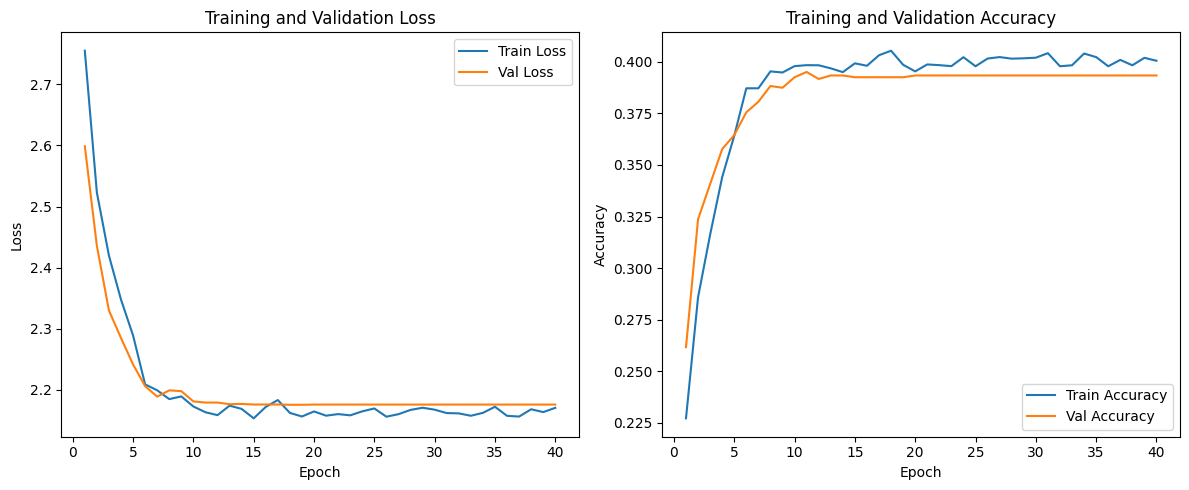

In [32]:

output_data_dir = "/kaggle/working/seq2label_data_embedding"
dev_clean_dir = "/kaggle/input/dev-clean-1"
train_clean360_dir = "/kaggle/input/training-data-360-3330-3446-1264-1265"

# Step 1: Extract speaker IDs from .flac filenames
def get_speaker_ids_from_files(directory):
    speaker_ids = set()
    for file in os.listdir(directory):
        if file.endswith(".flac"):
            speaker_id = file.split("-")[0]
            speaker_ids.add(speaker_id)
    return speaker_ids

train_speaker_ids = get_speaker_ids_from_files(train_clean360_dir)
dev_speaker_ids = get_speaker_ids_from_files(dev_clean_dir)

print("Train speaker IDs:", train_speaker_ids)
print("Dev speaker IDs:", dev_speaker_ids)

# Step 2: Split .pt files into train and val based on speaker IDs
train_ids = set()
val_ids = set()
for file in os.listdir(output_data_dir):
    if file.endswith("_features.pt"):
        utterance_id = file.replace("_features.pt", "")
        speaker_id = utterance_id.split("-")[0]
        if speaker_id in train_speaker_ids:
            train_ids.add(utterance_id)
        if speaker_id in dev_speaker_ids:
            val_ids.add(utterance_id)

print("Train IDs:", list(train_ids)[:5])
print("Val IDs:", list(val_ids)[:5])
pt_files = [f for f in os.listdir(output_data_dir) if f.endswith("_features.pt")]
print("Available .pt files:", pt_files[:5])
print("Number of train files:", len([f for f in pt_files if f.replace("_features.pt", "") in train_ids]))
print("Number of val files:", len([f for f in pt_files if f.replace("_features.pt", "") in val_ids]))

# Step 3: Build a shared label vocabulary using all .pt files
def build_label_vocabulary(data_dir):
    all_labels = set()
    for file in os.listdir(data_dir):
        if file.endswith("_features.pt"):
            data = torch.load(os.path.join(data_dir, file), weights_only=False)
            for _, _, _, label, _ in data:
                all_labels.add(label)
    label2id = {label: idx for idx, label in enumerate(sorted(all_labels))}
    return label2id

label2id = build_label_vocabulary(output_data_dir)
print("Shared label2id:", label2id)

# Step 4: Dataset class with shared label vocabulary
class Seq2LabelDataset(Dataset):
    def __init__(self, data_dir, subset_ids=None, label2id=None):
        self.data_files = []
        for file in os.listdir(data_dir):
            if file.endswith("_features.pt"):
                utterance_id = file.replace("_features.pt", "")
                if subset_ids is None or utterance_id in subset_ids:
                    self.data_files.append(os.path.join(data_dir, file))
        
        if not self.data_files:
            raise ValueError("No data files found for the given subset_ids")
        
        self.label2id = label2id
        self.id2label = {idx: label for label, idx in self.label2id.items()}
    
    def __len__(self):
        return len(self.data_files)
    
    def __getitem__(self, idx):
        data = torch.load(self.data_files[idx], weights_only=False)
        embeddings = []
        labels = []
        for _, _, _, label, emb in data:
            embeddings.append(torch.tensor(emb, dtype=torch.float32))
            labels.append(self.label2id[label])
        embeddings = torch.stack(embeddings)  # Shape: (seq_len, 768)
        labels = torch.tensor(labels, dtype=torch.long)  # Shape: (seq_len,)
        return embeddings, labels

# Step 5: Custom collate function for padding
def collate_fn(batch):
    embeddings, labels = zip(*batch)
    
    max_len = max(emb.shape[0] for emb in embeddings)
    
    padded_embeddings = []
    padded_labels = []
    for emb, lbl in zip(embeddings, labels):
        seq_len = emb.shape[0]
        if seq_len < max_len:
            padding = torch.zeros((max_len - seq_len, emb.shape[1]), dtype=emb.dtype)
            padded_emb = torch.cat([emb, padding], dim=0)
            padding_labels = torch.full((max_len - seq_len,), -1, dtype=lbl.dtype)
            padded_lbl = torch.cat([lbl, padding_labels], dim=0)
        else:
            padded_emb = emb
            padded_lbl = lbl
        padded_embeddings.append(padded_emb)
        padded_labels.append(padded_lbl)
    
    padded_embeddings = torch.stack(padded_embeddings)  # Shape: (batch, max_len, 768)
    padded_labels = torch.stack(padded_labels)  # Shape: (batch, max_len)
    return padded_embeddings, padded_labels

# Step 6: Model with positional encodings
class Seq2LabelModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_labels, num_layers=2, dropout=0.3, max_len=100):
        super(Seq2LabelModel, self).__init__()
        self.input_dim = input_dim
        self.positional_encoding = nn.Parameter(torch.zeros(max_len, input_dim))
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_dim,
                nhead=8,
                dim_feedforward=hidden_dim,
                dropout=dropout,
                batch_first=True
            ),
            num_layers=num_layers
        )
        self.fc = nn.Linear(input_dim, num_labels)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        pos_enc = self.positional_encoding[:seq_len, :].unsqueeze(0).expand(batch_size, -1, -1)
        x = x + pos_enc
        x = self.transformer(x)
        x = self.dropout(x)
        logits = self.fc(x)
        return logits

import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, num_epochs=15, device="cuda"):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=-1)
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_preds, train_labels = [], []
        for embeddings, labels in train_loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            optimizer.zero_grad()
            logits = model(embeddings)
            loss = criterion(logits.view(-1, logits.size(-1)), labels.view(-1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            mask = labels != -1
            preds = torch.argmax(logits, dim=-1)
            train_preds.extend(preds[mask].cpu().numpy())
            train_labels.extend(labels[mask].cpu().numpy())
        
        train_acc = accuracy_score(train_labels, train_preds)
        train_losses.append(train_loss / len(train_loader))
        train_accs.append(train_acc)
        
        model.eval()
        val_loss = 0.0
        val_preds, val_labels = [], []
        with torch.no_grad():
            for embeddings, labels in val_loader:
                embeddings, labels = embeddings.to(device), labels.to(device)
                logits = model(embeddings)
                loss = criterion(logits.view(-1, logits.size(-1)), labels.view(-1))
                val_loss += loss.item()
                mask = labels != -1
                preds = torch.argmax(logits, dim=-1)
                val_preds.extend(preds[mask].cpu().numpy())
                val_labels.extend(labels[mask].cpu().numpy())
        
        val_acc = accuracy_score(val_labels, val_preds)
        val_losses.append(val_loss / len(val_loader))
        val_accs.append(val_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs}:")
        print(f"  Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}")
        print(f"  Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "/kaggle/working/best_seq2label_model.pt")
            print("Saved best model!")
        
        scheduler.step()
    
    # Plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accs, label='Train Accuracy')
    plt.plot(range(1, num_epochs+1), val_accs, label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return train_losses, val_losses, train_accs, val_accs

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def compute_metrics(dataset, model, device="cuda"):
    model.eval()
    all_preds = []
    all_labels = []
    total_uas_correct = 0
    total_las_correct = 0
    total_words = 0
    with torch.no_grad():
        for embeddings, labels in DataLoader(dataset, batch_size=1, collate_fn=collate_fn):
            embeddings, labels = embeddings.to(device), labels.to(device)
            logits = model(embeddings)
            preds = torch.argmax(logits, dim=-1).cpu().numpy().flatten()
            true_labels = labels.cpu().numpy().flatten()
            
            for pred, true in zip(preds, true_labels):
                if true == -1:
                    continue
                all_preds.append(pred)
                all_labels.append(true)
                pred_label = dataset.id2label[pred]
                true_label = dataset.id2label[true]
                pred_rel_pos = int(pred_label.split("@")[0])
                true_rel_pos = int(true_label.split("@")[0])
                if pred_rel_pos == true_rel_pos:
                    total_uas_correct += 1
                if pred_label == true_label:
                    total_las_correct += 1
                total_words += 1
    uas = total_uas_correct / total_words if total_words > 0 else 0
    las = total_las_correct / total_words if total_words > 0 else 0
    
    # Plot confusion matrix
    labels = sorted(set(all_labels))
    label_names = [dataset.id2label[l] for l in labels]
    cm = confusion_matrix(all_labels, all_preds, labels=labels)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for Dependency Labels')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return uas, las

          
       



# Step 9: Prepare data and train
train_dataset = Seq2LabelDataset(output_data_dir, train_ids, label2id=label2id)
val_dataset = Seq2LabelDataset(output_data_dir, val_ids, label2id=label2id)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, collate_fn=collate_fn)

input_dim = 768
hidden_dim = 512
num_labels = len(label2id)
model = Seq2LabelModel(input_dim, hidden_dim, num_labels, dropout=0.3)

device = "cuda" if torch.cuda.is_available() else "cpu"
train_loss , val_loss, train_accuracy, val_accuracy = train_model(model, train_loader, val_loader, num_epochs=40, device=device)




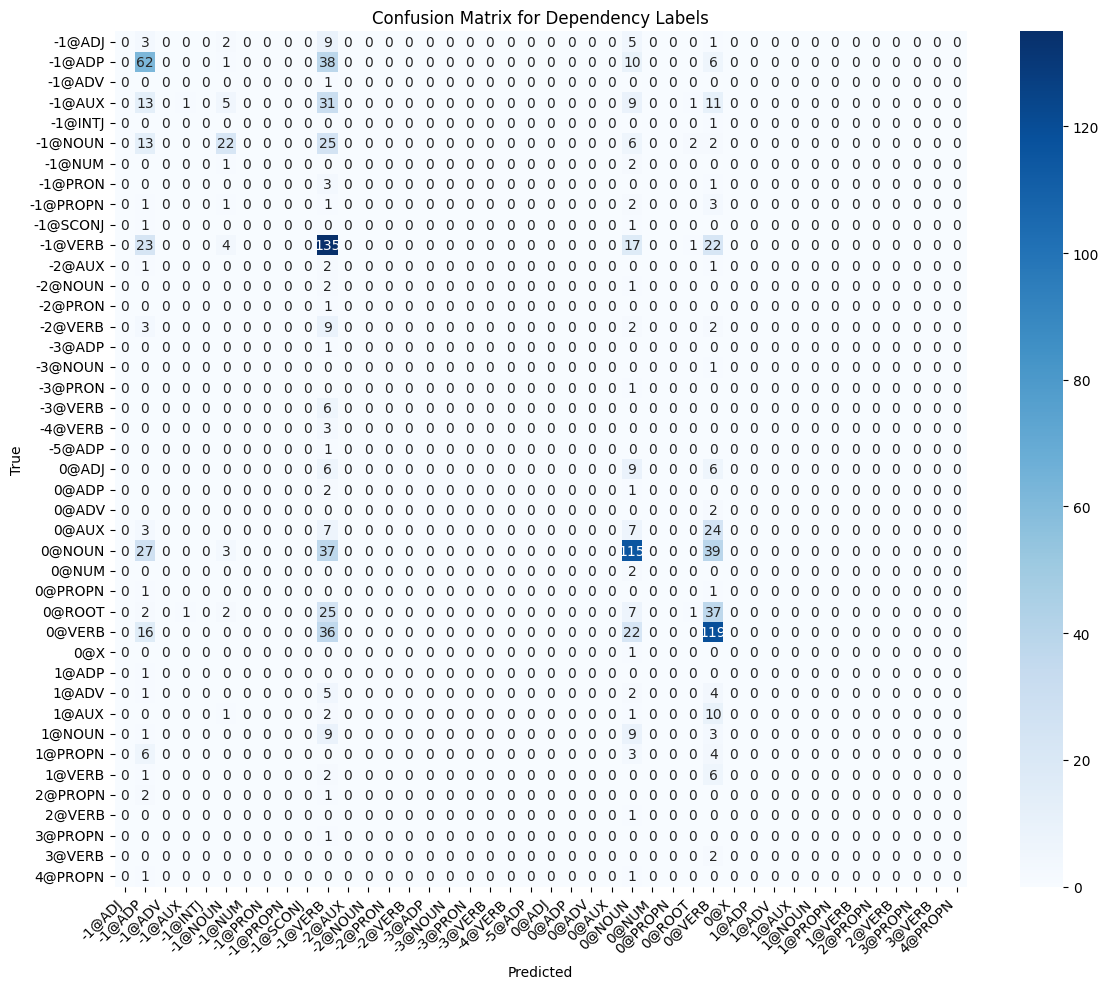

In [33]:
val_uas, val_las = compute_metrics(val_dataset, model, device)

In [34]:
print(f"Validation UAS: {val_uas:.4f}")
print(f"Validation LAS: {val_las:.4f}")

Validation UAS: 0.6703
Validation LAS: 0.3866


In [35]:
# Step 10: Predict labels for a specific validation audio file
def predict_labels_for_val_file(val_utterance_id, val_dataset, model, device="cuda"):
    # Find the index of the utterance in the validation dataset
    val_files = val_dataset.data_files
    target_file = None
    for file_path in val_files:
        if val_utterance_id in file_path:
            target_file = file_path
            break
    
    if target_file is None:
        print(f"Utterance ID {val_utterance_id} not found in validation set.")
        return
    
    # Load the data
    data = torch.load(target_file, weights_only=False)
    embeddings = []
    true_labels = []
    words = []
    for word, _, _, label, emb in data:
        embeddings.append(torch.tensor(emb, dtype=torch.float32))
        true_labels.append(label)
        words.append(word)
    
    embeddings = torch.stack(embeddings)  # Shape: (seq_len, 768)
    true_label_ids = torch.tensor([val_dataset.label2id[label] for label in true_labels], dtype=torch.long)
    
    # Predict labels
    model.eval()
    embeddings = embeddings.unsqueeze(0).to(device)  # Add batch dimension: (1, seq_len, 768)
    with torch.no_grad():
        logits = model(embeddings)
        pred_label_ids = torch.argmax(logits, dim=-1).cpu().numpy().flatten()
    
    # Convert label IDs back to labels
    id2label = val_dataset.id2label
    pred_labels = [id2label[pid] for pid in pred_label_ids]
    true_labels = [id2label[tid.item()] for tid in true_label_ids]
    
    # Print predictions and ground truth
    print(f"\nPrediction Results for {val_utterance_id}:")
    print(f"{'Word':<15} {'True Label':<15} {'Predicted Label':<15}")
    print("-" * 45)
    for word, true, pred in zip(words, true_labels, pred_labels):
        print(f"{word:<15} {true:<15} {pred:<15}")
    
    # Compute accuracy for this sample
    correct = sum(1 for t, p in zip(true_labels, pred_labels) if t == p)
    accuracy = correct / len(true_labels)
    print(f"\nSample Accuracy: {accuracy:.4f}")
    
    # Compute UAS and LAS for this sample
    uas_correct = 0
    las_correct = 0
    total_words = len(true_labels)
    for true, pred in zip(true_labels, pred_labels):
        true_rel_pos = int(true.split("@")[0])
        pred_rel_pos = int(pred.split("@")[0])
        if true_rel_pos == pred_rel_pos:
            uas_correct += 1
        if true == pred:
            las_correct += 1
    
    sample_uas = uas_correct / total_words
    sample_las = las_correct / total_words
    print(f"Sample UAS: {sample_uas:.4f}")
    print(f"Sample LAS: {sample_las:.4f}")

# Step 11: Choose a validation utterance to predict
val_utterance_id = "1272-128104-0009"  # You can change this to any ID in val_ids
predict_labels_for_val_file(val_utterance_id, val_dataset, model, device)


Prediction Results for 1272-128104-0009:
Word            True Label      Predicted Label
---------------------------------------------
he              0@VERB          0@VERB         
laments         0@ROOT          0@VERB         
most            1@ADV           0@NOUN         
bitterly        -1@VERB         0@VERB         
the             0@NOUN          0@NOUN         
divorce         -1@VERB         -1@VERB        
that            0@VERB          0@VERB         
has             0@VERB          0@VERB         
been            0@VERB          0@VERB         
made            -1@NOUN         -1@VERB        
between         -1@VERB         -1@VERB        
decorative      0@NOUN          -1@VERB        
art             -1@ADP          -1@ADP         
and             -1@VERB         -1@VERB        
what            0@VERB          0@VERB         
we              0@VERB          0@VERB         
usually         0@VERB          0@VERB         
call            1@VERB          -1@VERB        
